In [172]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [363]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

In [174]:
sql = "select community_id_fastgreedy_is, count(*) from nodes_until_november group by community_id_fastgreedy_is having count(*) > 2 order by count(*) asc;"
result_df = cn.select_query_result_to_df(sql)
communities = list(np.array(result_df['community_id_fastgreedy_is'].values.tolist()))

In [176]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [447]:
print(communities)
print(len(communities))

['6849', '4248', '13798', '8382', '4238', '3663', '6887', '8432', '10417', '8969', '11934', '13491', '8298', '7853', '5255', '4811', '3094', '5452', '7802', '7152', '12619', '9328', '512', '16660', '9989', '15913', '6759', '469', '16130', '3866', '8718', '2735', '4074', '10260', '5118', '16855', '7028', '5260', '15358', '5368', '1832', '2299', '2011', '6329', '3692', '11446', '9603', '13171', '9722', '7947', '16240', '6828', '3430', '19695', '5242', '4443', '5345', '1545', '8827', '19426', '908', '11604', '10954', '12033', '18543', '6247', '2329', '8878', '7338', '4103', '2174', '7742', '2266', '8175', '12189', '1882', '10385', '1501', '12084', '19870', '6084', '1884', '2026', '3901', '13920', '5318', '8367', '11084', '1867', '3938', '5430', '4437', '4574', '1774', '4336', '263', '5443', '866', '6209', '2912', '6197', '9228', '1469', '7936', '640', '5756', '2756', '4017', '2860', '2859', '2898', '15720', '268', '18992', '3954', '11003', '1715', '8322', '3683', '15569', '4372', '1548', 

In [199]:
# print(filenames)
print(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[0]}')

../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/community_6849_topics_10_words.csv


In [178]:
import math

mean_vector_list = []
topics_num = []

for i in range(len(communities)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics_num.append(len(topics))
        model = Word2Vec(topics, min_count=1)
        model.train(topics, total_examples=1, epochs=1)
    
        word_vectors = model.wv
        # print(len(word_vectors))

        # print(word_vectors[0].tolist())

        word_vector_list = []
        mean_vector = []
    
        for i in range(len(word_vectors)):
            word_vector_list.append(word_vectors[i].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [179]:
print(mean_vector_list[0][0])

-0.0021087670866108965


In [181]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]


## t-SNE

In [182]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]
[[-29.778774  -25.000711 ]
 [  3.606549    6.295797 ]
 [  1.2227609   8.144201 ]
 ...
 [ 43.496006  -16.084393 ]
 [ -1.7983787  12.323054 ]
 [ -2.031797   16.36044  ]]


In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

print(data_tsne)

for i in range(len(data)):
    plt.text(data_tsne[i,0], data_tsne[i,1], 'o',
            fontdict = {'weight':'bold','size':9})

In [188]:
print(len(data))
print(len(topics_num))

print(topics_num)

8228
8228
[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

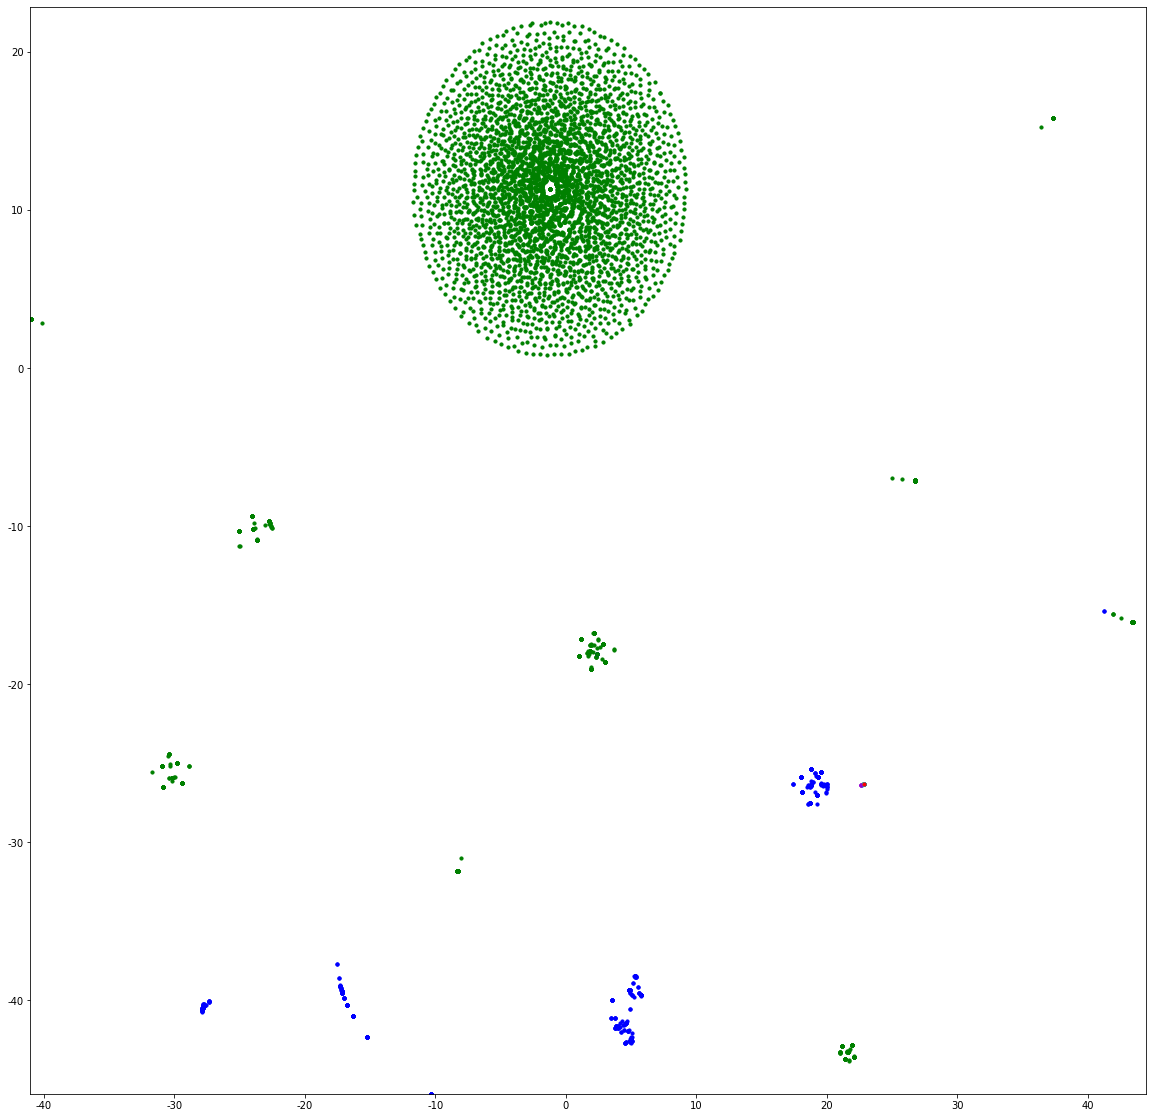

In [204]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

## global all topic words list

In [370]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))

82795


In [435]:
def word_count_and_tf_idf_similarity(filenames, topic_num, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

# number of topic 10 and 5 and 4

## topic_nums = 10 (members >= 10000)

In [384]:
communities_10 = []
communities_5 = []
communities_4 = []


for i in range(len(data)):
    if topics_num[i] == 10:
        communities_10.append(filenames[i])
    elif topics_num[i] == 5:
        communities_5.append(filenames[i])
    elif topics_num[i] == 4:
        communities_4.append(filenames[i])

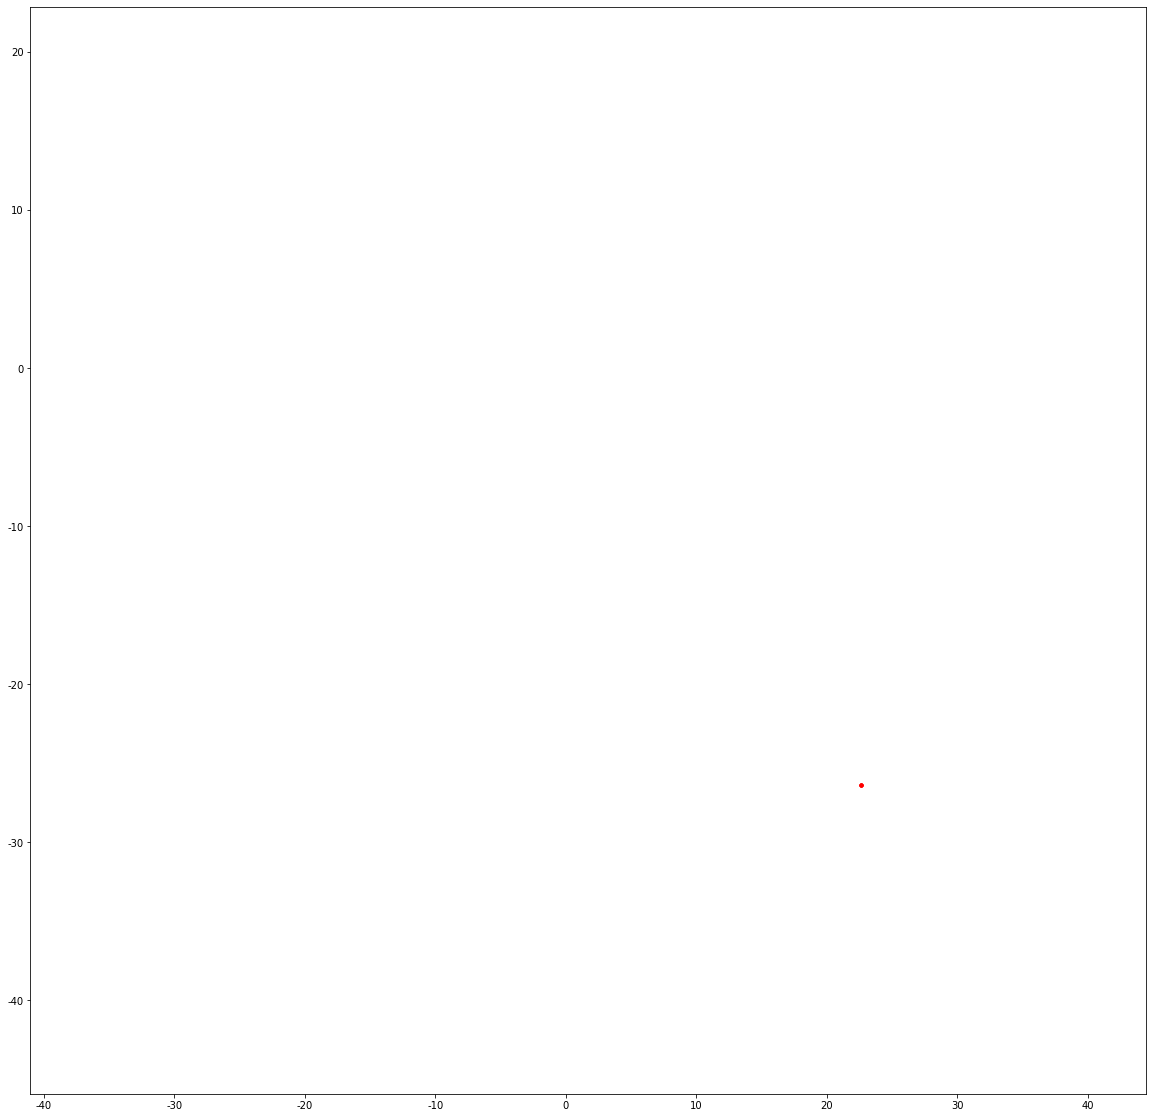

In [368]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 10:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [440]:
print(word_count_and_tf_idf_similarity(communities_10, 10))

[('life', 2.75),
 ('year', 2.25),
 ('today', 2.0),
 ('think', 1.75),
 ('need', 1.5),
 ('one', 1.5),
 ('hate', 1.5),
 ('anxiety', 1.25),
 ('thought', 1.25),
 ('first', 1.25),
 ('depression', 1.25),
 ('friend', 1.25),
 ('time', 1.25),
 ('stop', 1.0),
 ('depressed', 1.0),
 ('day', 1.0),
 ('even', 1.0),
 ('talk', 1.0),
 ('love', 1.0),
 ('tell', 1.0),
 ('go', 1.0),
 ('wish', 1.0),
 ('alone', 1.0),
 ('cry', 1.0),
 ('dae', 1.0),
 ('kill', 1.0),
 ('sleep', 0.75),
 ('advice', 0.75),
 ('best', 0.75),
 ('care', 0.75),
 ('lost', 0.75),
 ('better', 0.75),
 ('old', 0.75),
 ('suicide', 0.75),
 ('this', 0.75),
 ('finally', 0.75),
 ('mom', 0.75),
 ('therapist', 0.75),
 ('wrong', 0.75),
 ('relationship', 0.75),
 ('work', 0.75),
 ('sad', 0.75),
 ('suicidal', 0.75),
 ('job', 0.75),
 ('right', 0.75),
 ('parent', 0.75),
 ('feeling', 0.75),
 ('you', 0.75),
 ('therapy', 0.75),
 ('mental', 0.75),
 ('made', 0.75),
 ('week', 0.75),
 ('person', 0.75),
 ('fuck', 0.75),
 ('birthday', 0.75),
 ('tired', 0.75),
 ('cou

## topic_nums = 5 (members >= 1000)

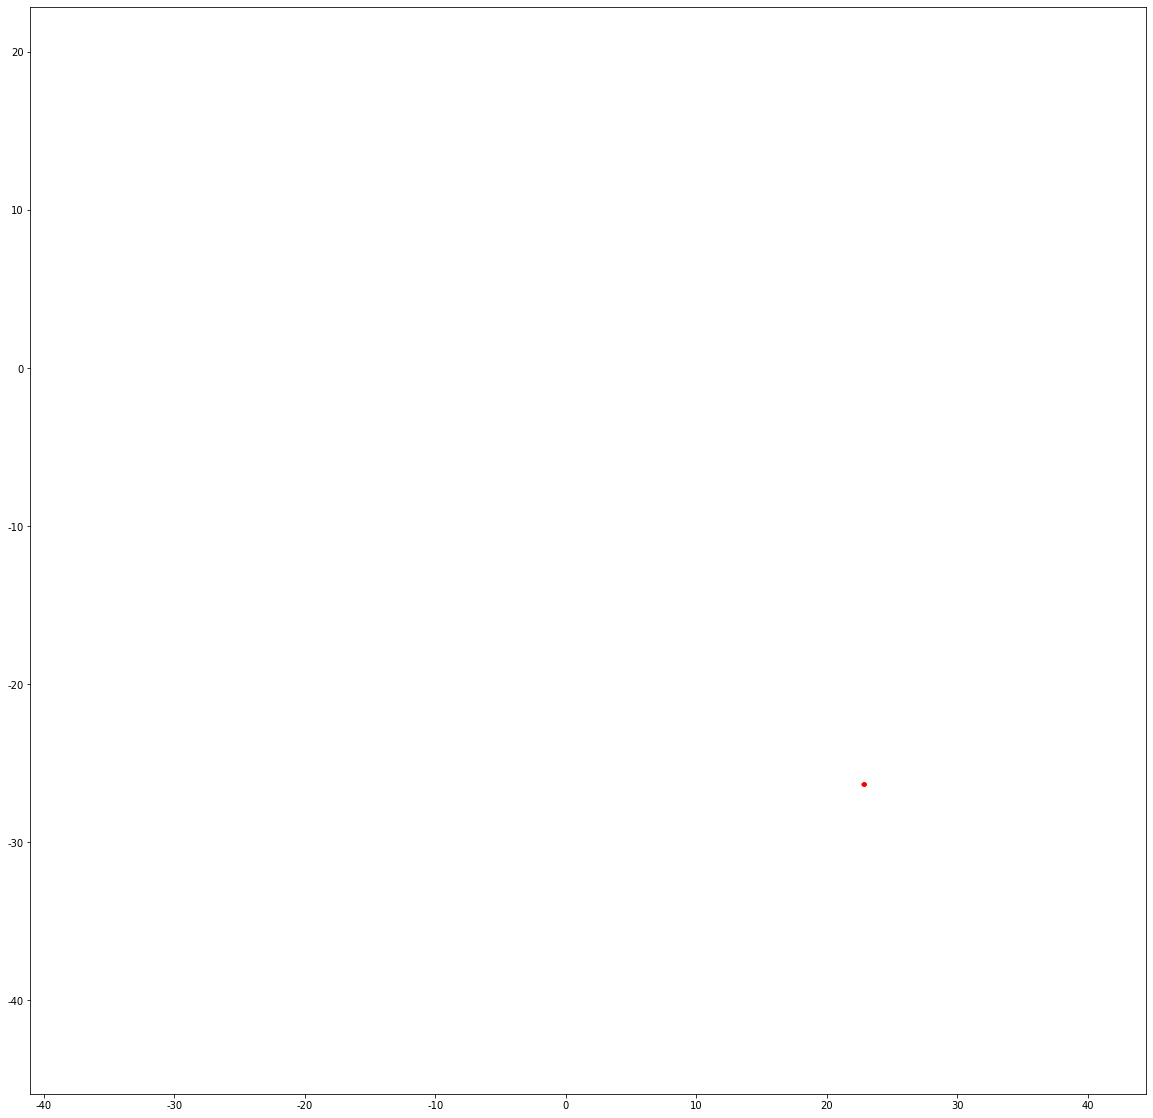

In [367]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)

plt.show()

In [441]:
word_count_and_tf_idf_similarity(communities_5, 5)

[('friend', 2.0),
 ('need', 1.8),
 ('life', 1.6),
 ('think', 1.6),
 ('depression', 1.4),
 ('time', 1.4),
 ('suicide', 1.2),
 ('today', 1.2),
 ('year', 1.2),
 ('kill', 1.2),
 ('advice', 1.0),
 ('one', 1.0),
 ('day', 1.0),
 ('angry', 1.0),
 ('go', 1.0),
 ('hate', 1.0),
 ('anger', 1.0),
 ('bullied', 0.8),
 ('stop', 0.8),
 ('bully', 0.8),
 ('bullying', 0.8),
 ('depressed', 0.8),
 ('feeling', 0.8),
 ('anxiety', 0.6),
 ('die', 0.6),
 ('suicidal', 0.6),
 ('thought', 0.6),
 ('fuck', 0.6),
 ('lost', 0.4),
 ('this', 0.4),
 ('month', 0.4),
 ('hurt', 0.4),
 ('harm', 0.4),
 ('existential', 0.4),
 ('say', 0.4),
 ('sad', 0.4),
 ('much', 0.4),
 ('school', 0.4),
 ('living', 0.4),
 ('end', 0.4),
 ('person', 0.4),
 ('crisis', 0.4),
 ('tired', 0.4),
 ('lonely', 0.4),
 ('find', 0.4),
 ('clean', 0.4),
 ('guy', 0.4),
 ('death', 0.2),
 ('mad', 0.2),
 ('universe', 0.2),
 ('stand', 0.2),
 ('music', 0.2),
 ('never', 0.2),
 ('killing', 0.2),
 ('care', 0.2),
 ('still', 0.2),
 ('everyone', 0.2),
 ('legit', 0.2),
 (

## topic_nums = 4 (members >= 100)

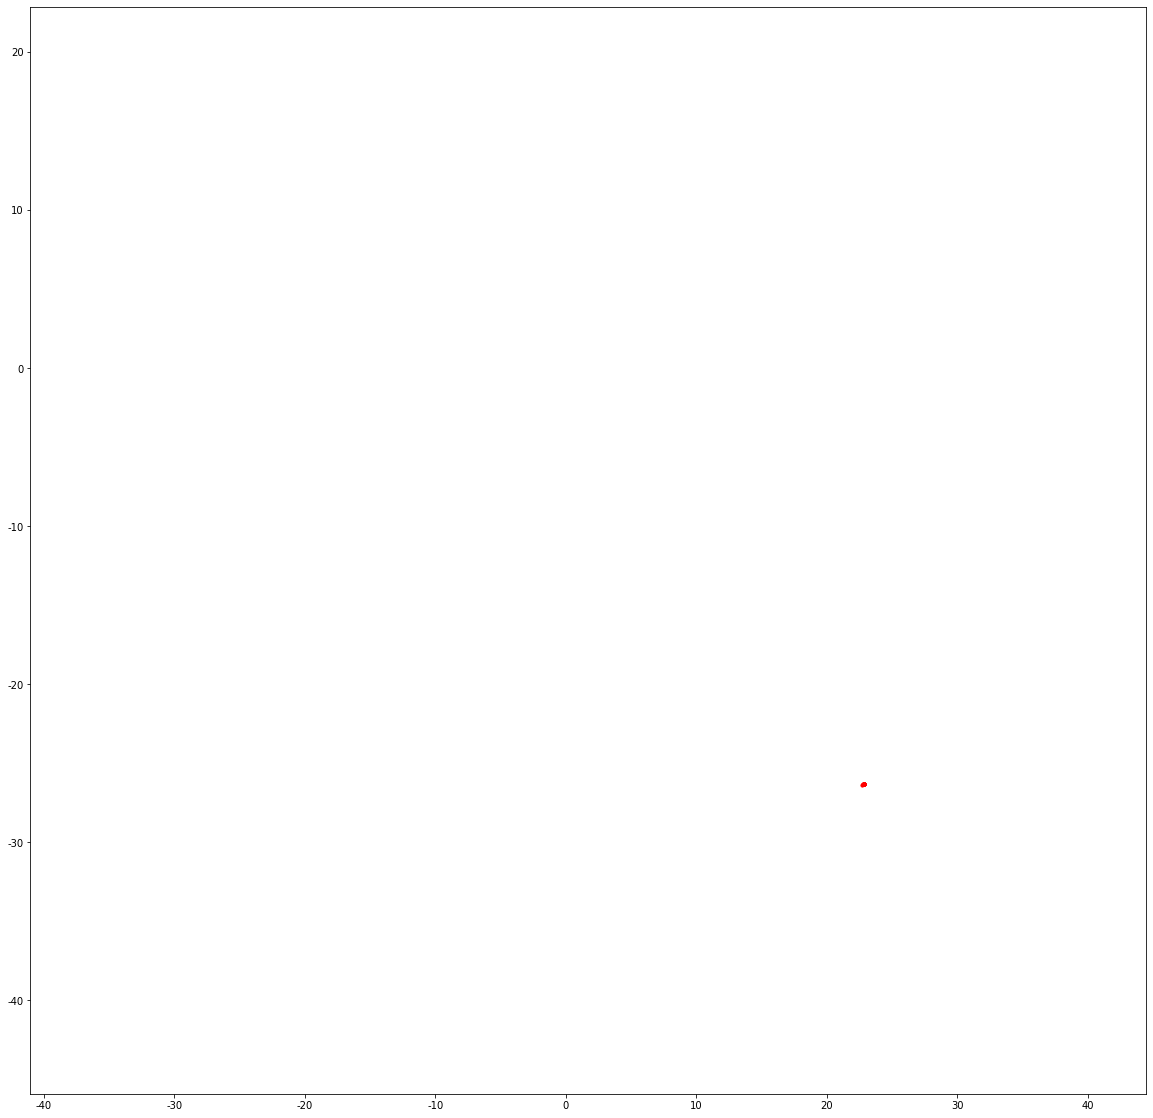

In [310]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 4:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [443]:
print(word_count_and_tf_idf_similarity(communities_4, 4))

[('need', 1.3571), ('depression', 1.3571), ('life', 1.2143), ('depressed', 0.8571), ('friend', 0.7857), ('hate', 0.7143), ('one', 0.6429), ('talk', 0.6429), ('think', 0.6429), ('year', 0.6429), ('kill', 0.6429), ('die', 0.5714), ('time', 0.5714), ('stop', 0.5), ('anxiety', 0.5), ('suicide', 0.5), ('today', 0.5), ('thought', 0.5), ('tired', 0.5), ('better', 0.4286), ('day', 0.4286), ('alone', 0.4286), ('feeling', 0.4286), ('advice', 0.3571), ('never', 0.3571), ('go', 0.3571), ('much', 0.3571), ('end', 0.3571), ('way', 0.3571), ('give', 0.3571), ('care', 0.2857), ('lost', 0.2857), ('back', 0.2857), ('nothing', 0.2857), ('ive', 0.2857), ('hair', 0.2857), ('first', 0.2857), ('old', 0.2143), ('even', 0.2143), ('tonight', 0.2143), ('work', 0.2143), ('sad', 0.2143), ('worse', 0.2143), ('cry', 0.2143), ('therapy', 0.2143), ('made', 0.2143), ('actually', 0.2143), ('alive', 0.2143), ('birthday', 0.2143), ('lonely', 0.2143), ('scared', 0.2143), ('best', 0.1429), ('idk', 0.1429), ('killing', 0.142

## topic_nums = 3 (members >= 10)

# 3-1)

In [264]:
communities_3 = []

for i in range(len(data)):
    if topics_num[i] == 3:
        communities_3.append(filenames[i])

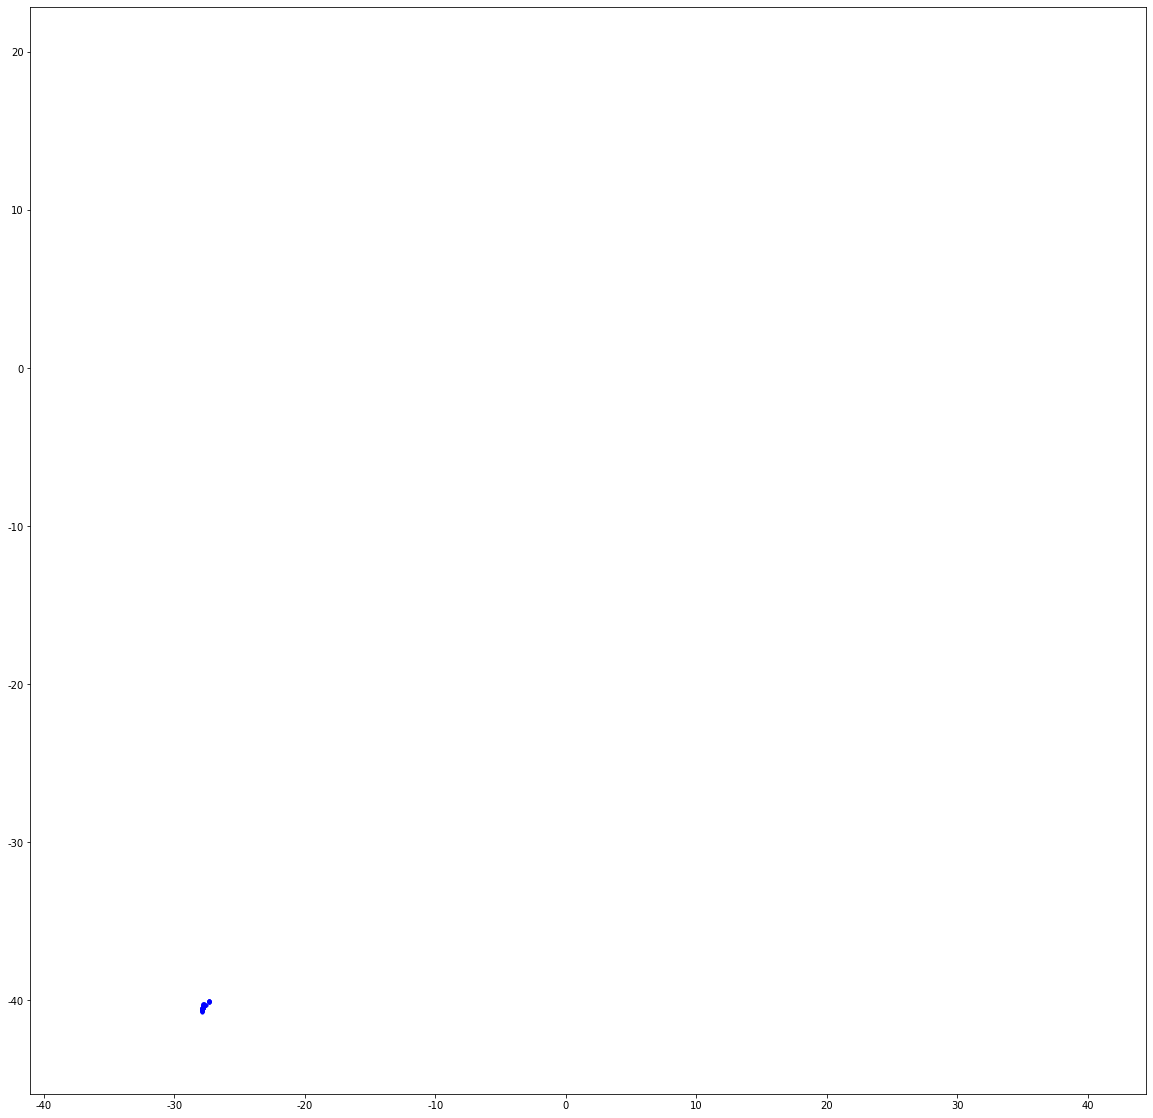

In [372]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -20 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames[i])

# 3-2)

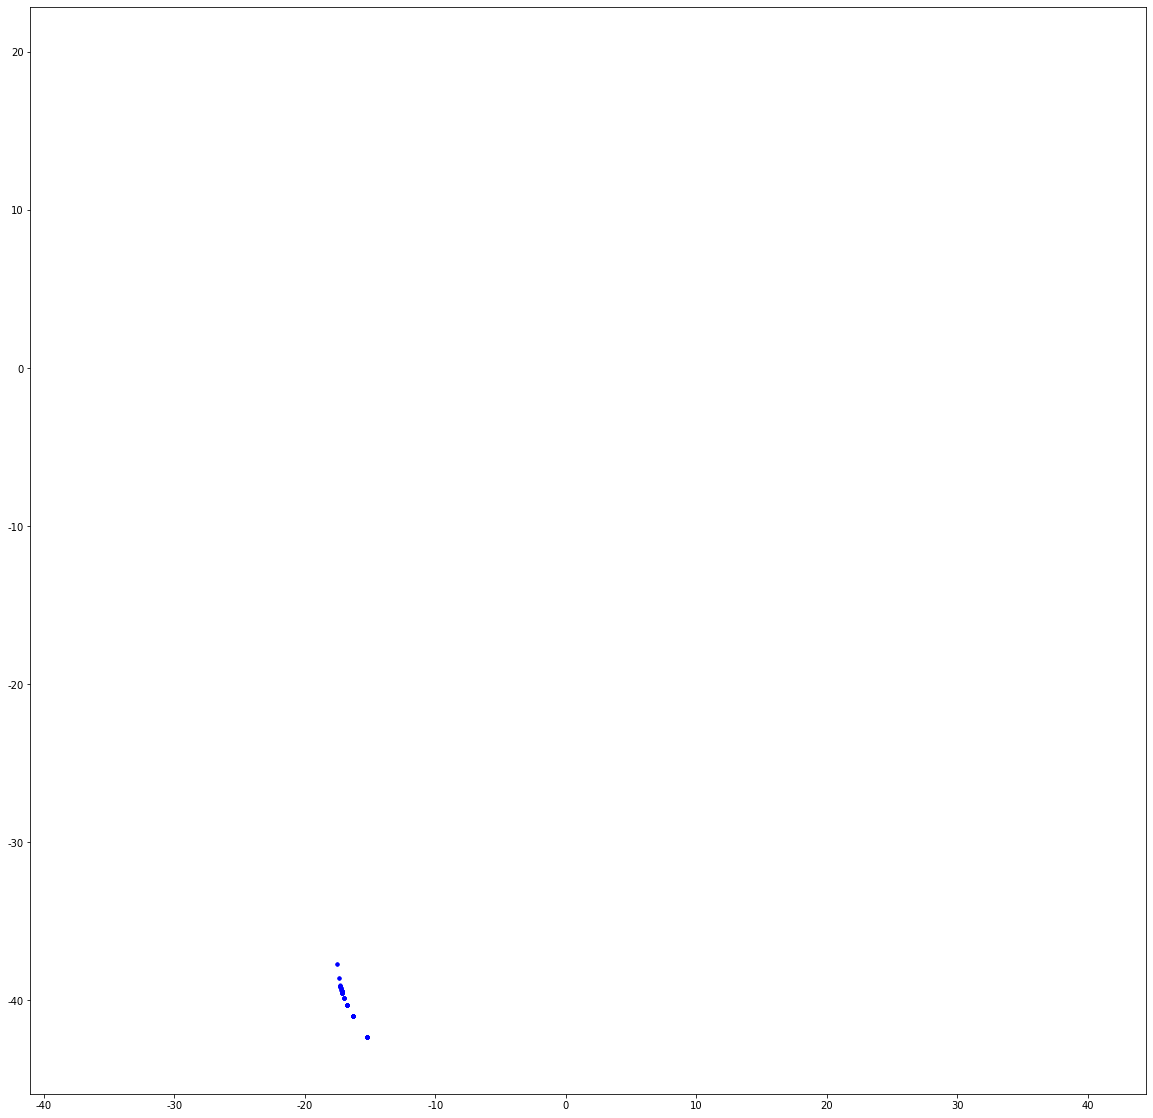

In [373]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -20 and data_tsne[i,0] < -12:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames[i])

# 3-3)

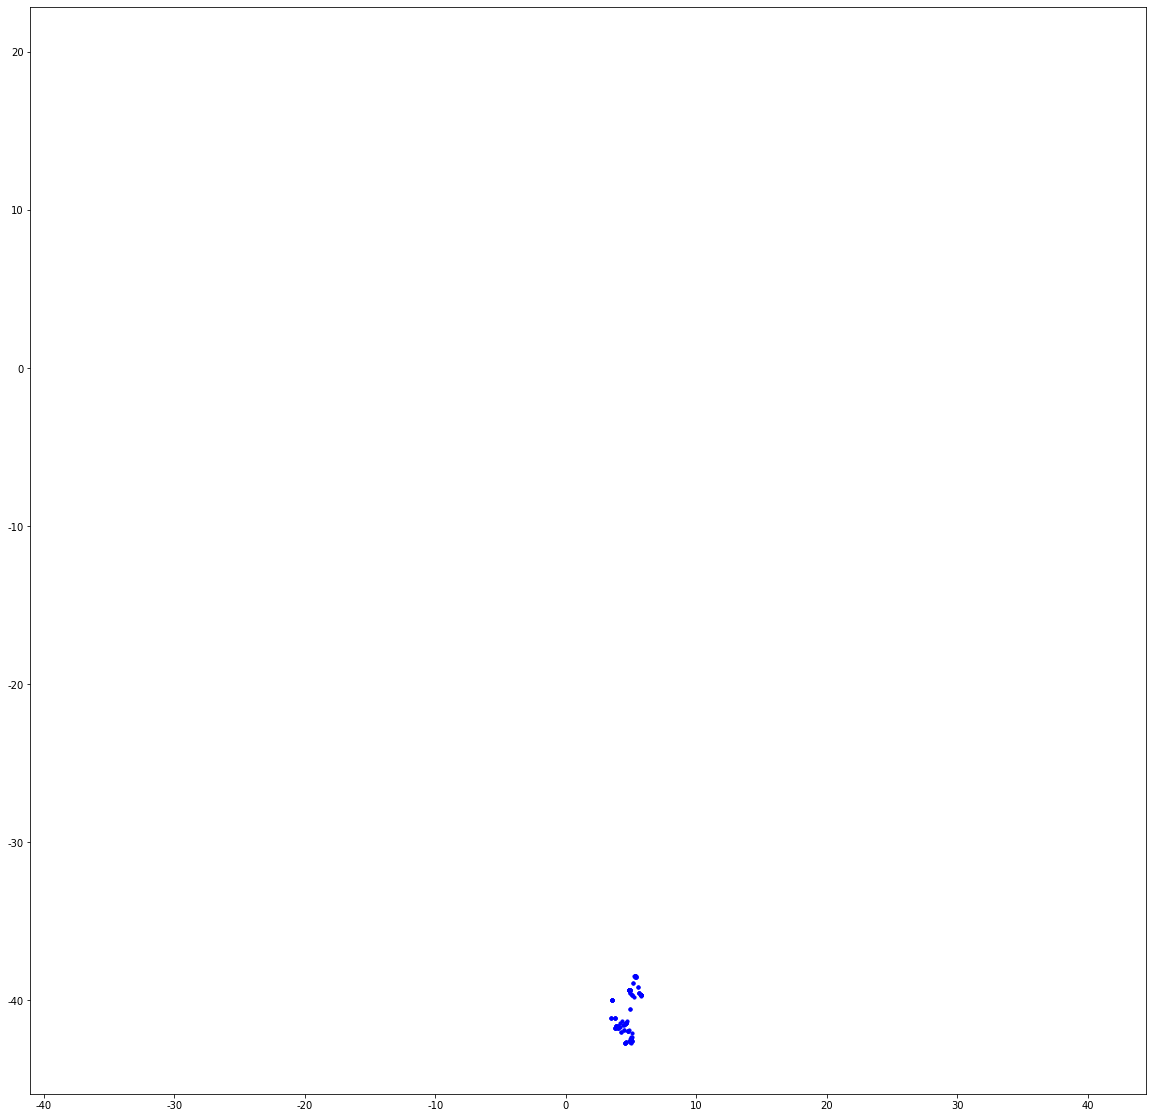

In [374]:
communities_3_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > 0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_3.append(filenames[i])

# 3-4)

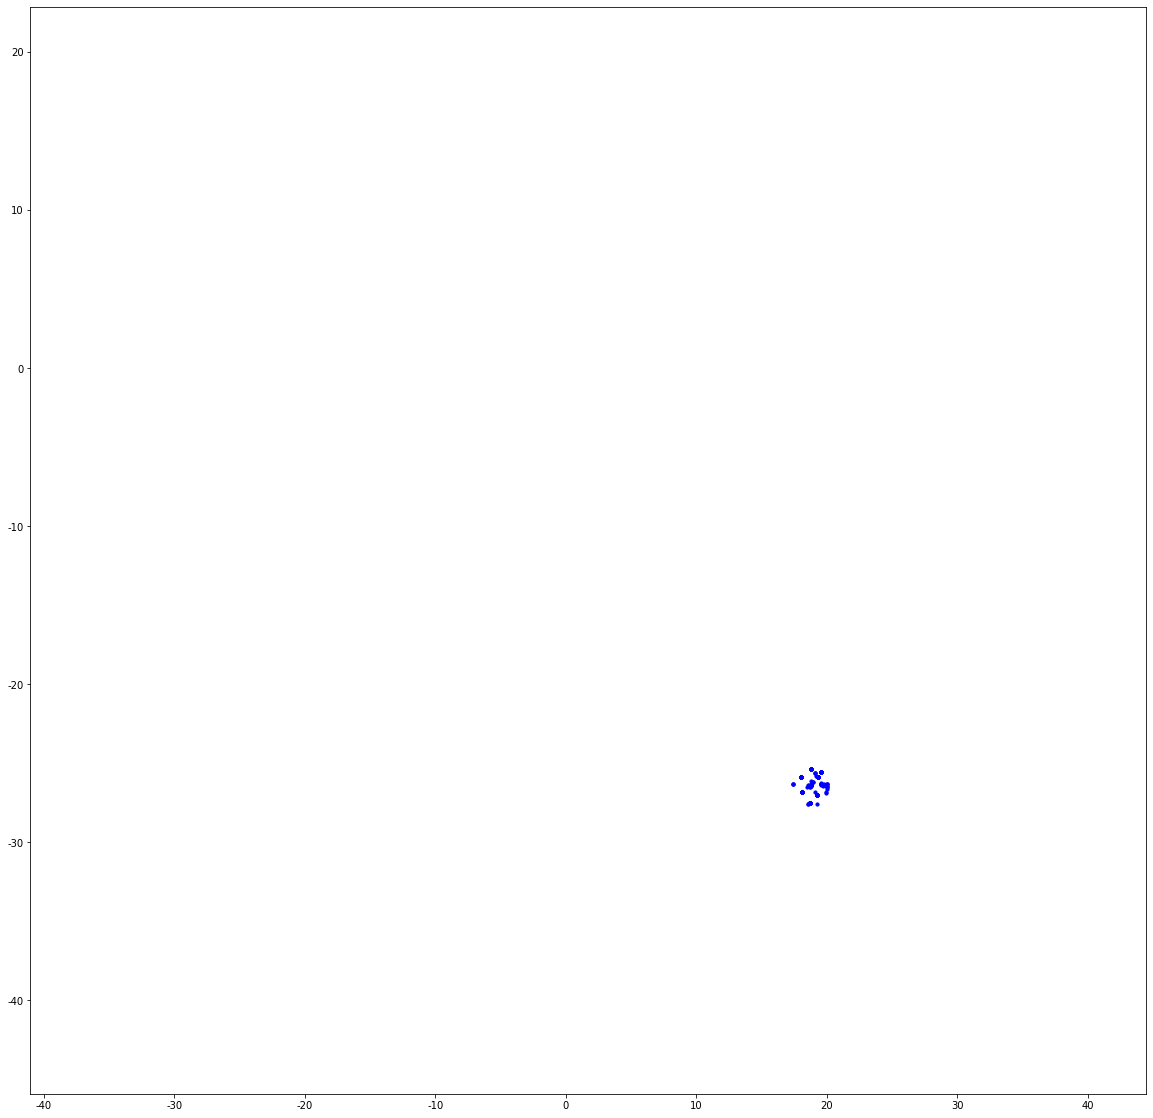

In [375]:
communities_3_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > -30 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_4.append(filenames[i])

In [448]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_3_1, 3), word_count_and_tf_idf_similarity(communities_3_2, 3), 
                word_count_and_tf_idf_similarity(communities_3_3, 3), word_count_and_tf_idf_similarity(communities_3_4, 3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 0.5375), ('life', 0.495), ('life', 0.5111), ('life', 0.4281))

2: (('life', 0.525), ('need', 0.4158), ('depression', 0.4222), ('depression', 0.3028))

3: (('depression', 0.4125), ('die', 0.4158), ('need', 0.3611), ('need', 0.2936))

4: (('friend', 0.375), ('hate', 0.3465), ('friend', 0.3444), ('friend', 0.2875))

5: (('hate', 0.35), ('kill', 0.3366), ('year', 0.3111), ('think', 0.2385))

6: (('time', 0.3375), ('talk', 0.2871), ('think', 0.2889), ('kill', 0.2355))

7: (('talk', 0.3), ('lonely', 0.2772), ('day', 0.2778), ('depressed', 0.2232))

8: (('kill', 0.2875), ('depression', 0.2673), ('die', 0.2611), ('die', 0.2232))

9: (('think', 0.275), ('think', 0.2475), ('feeling', 0.2611), ('feeling', 0.2171))

10: (('year', 0.2625), ('birthday', 0.2475), ('today', 0.2444), ('year', 0.2171))

11: (('one', 0.25), ('alone', 0.2277), ('kill', 0.2444), ('one', 0.208))

12: (('today', 0.25), ('anxiety', 0.2178), ('time', 0.2278), ('time', 0.2018))

13: (('anxiety', 0.25), ('friend', 0

## topic_nums = 1 (members < 10)

# 1-1)

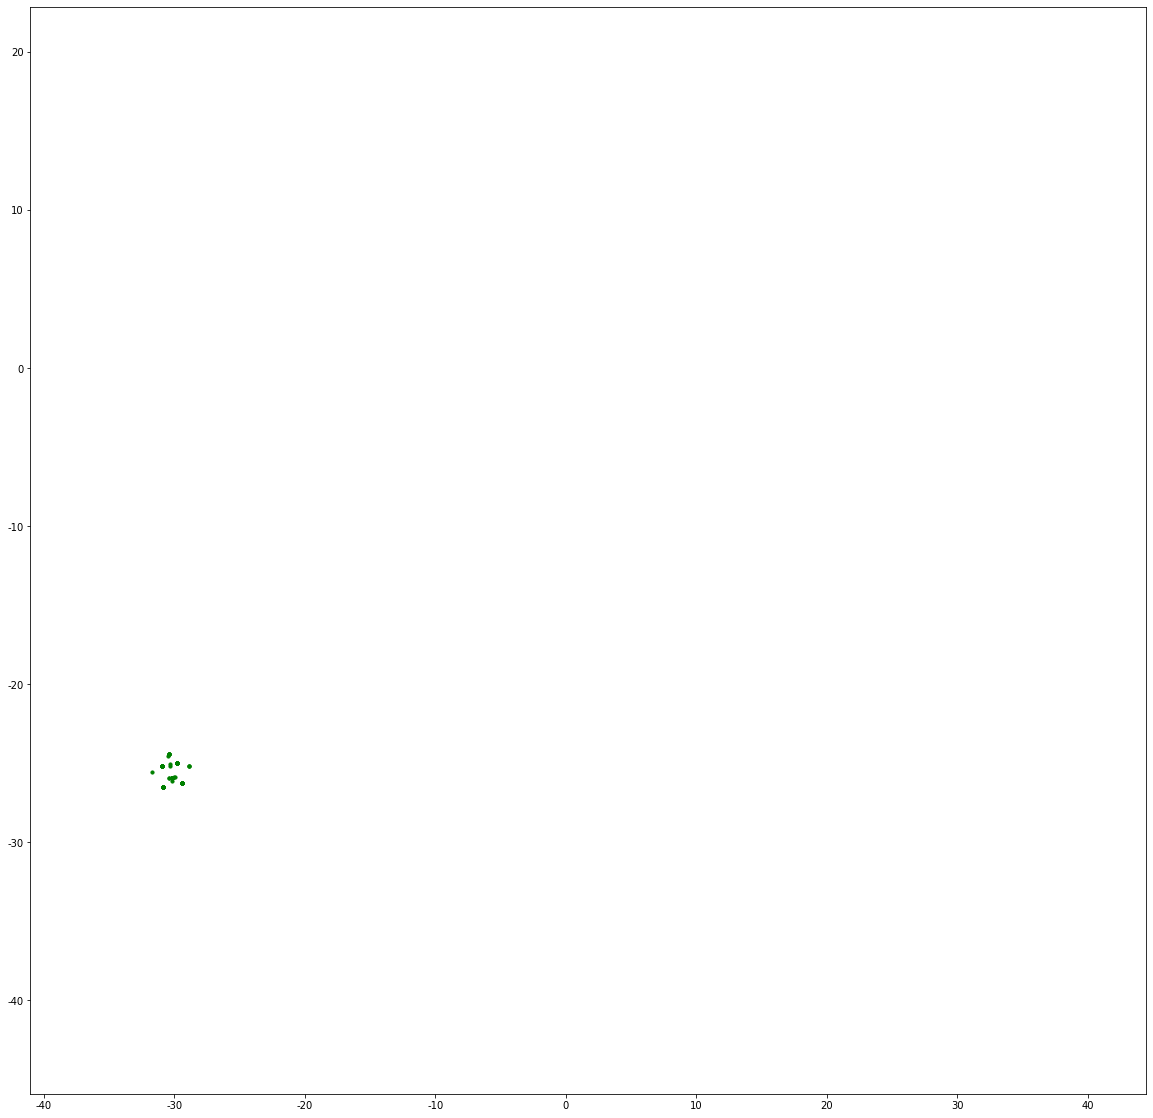

In [377]:
communities_1_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -35 and data_tsne[i,0] < -28:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_1.append(filenames[i])

# 1-2)

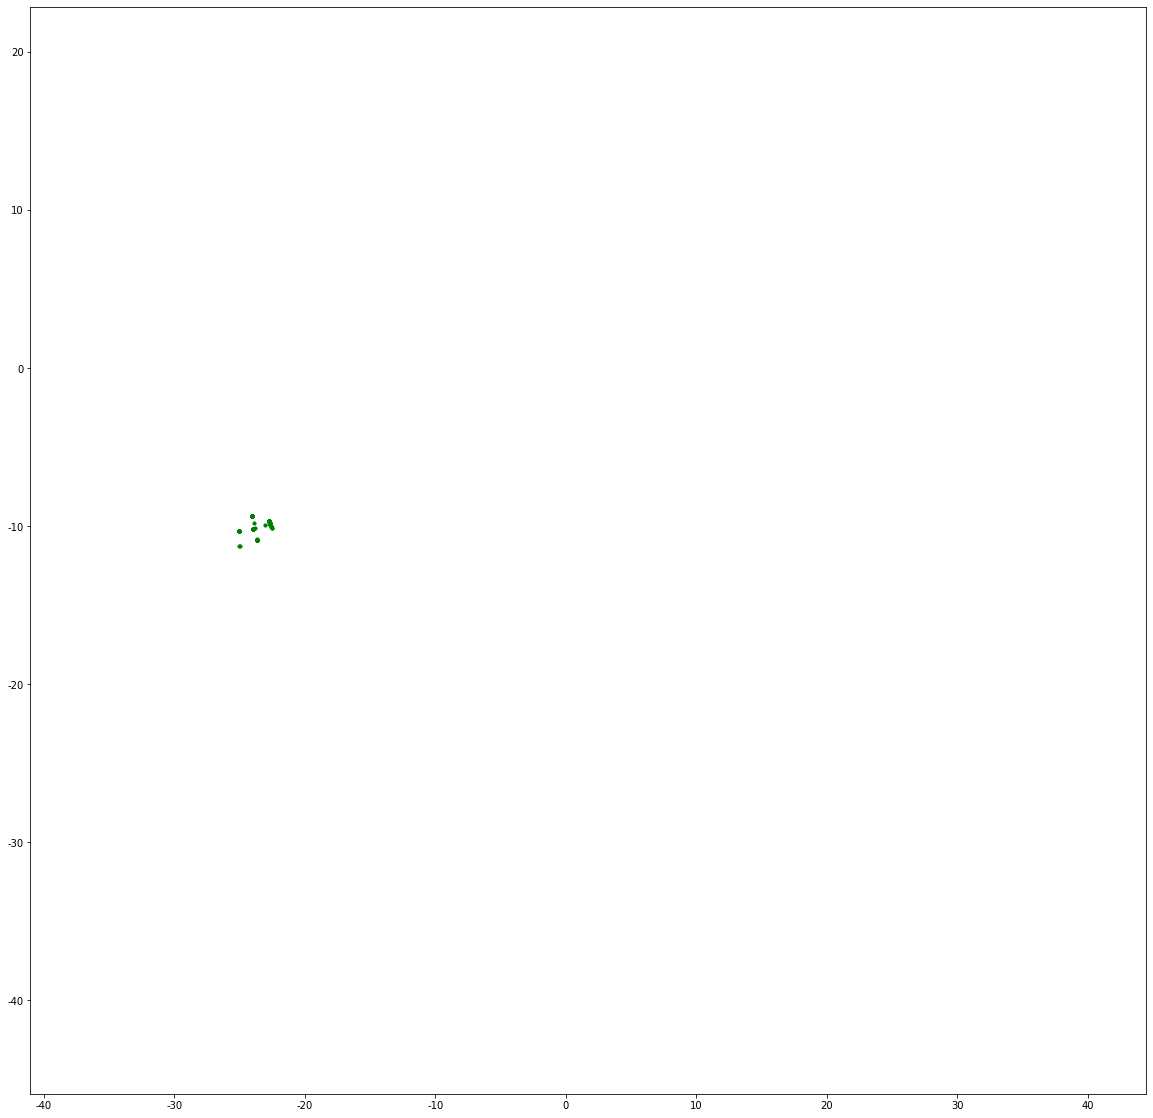

In [378]:
communities_1_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -28 and data_tsne[i,0] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_2.append(filenames[i])

# 1-3)

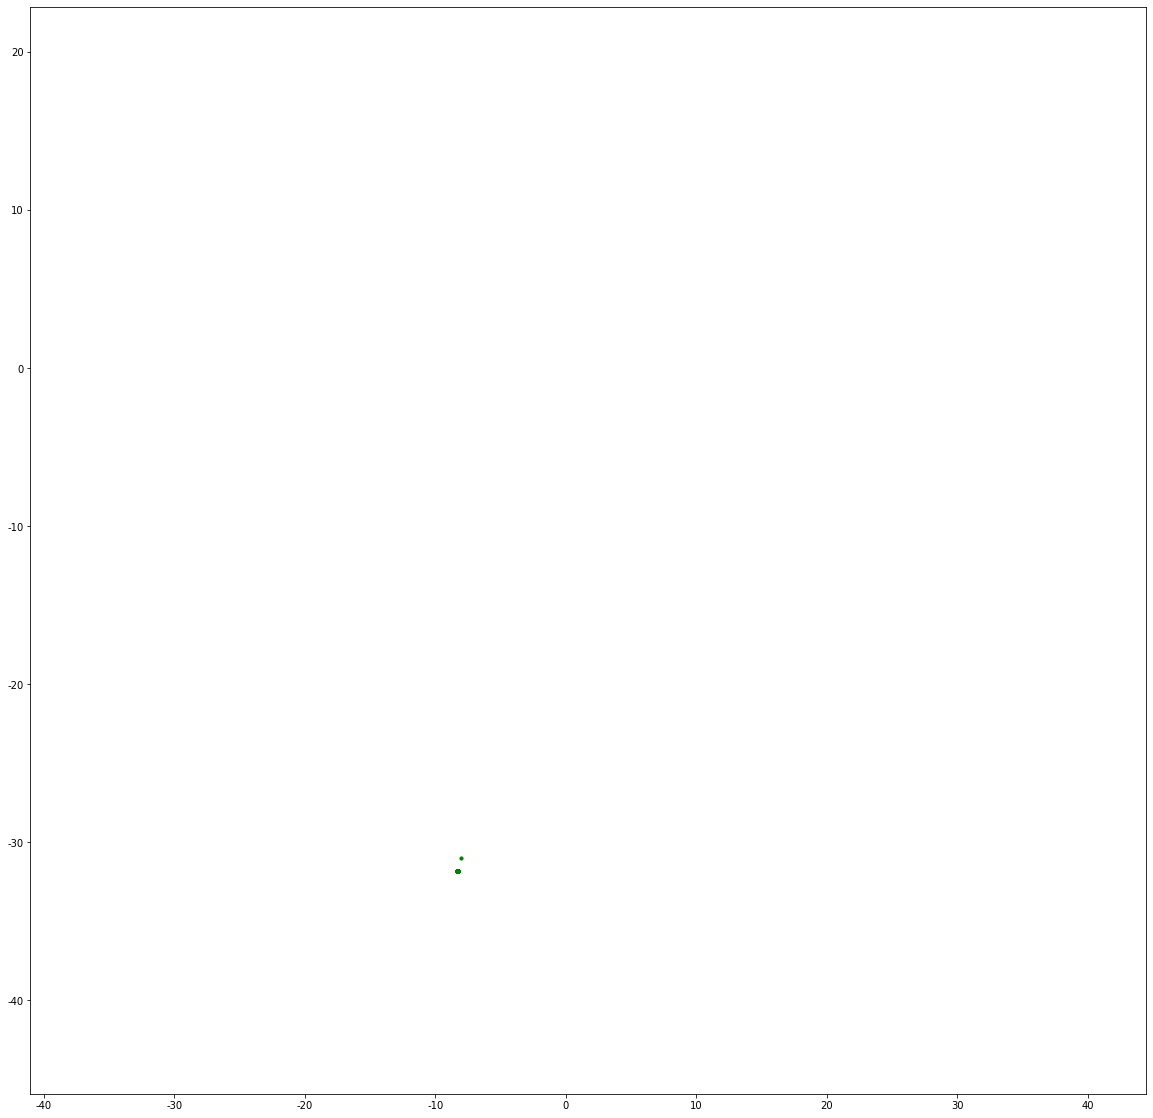

In [379]:
communities_1_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -12 and data_tsne[i,0] < -5 and data_tsne[i,1] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_3.append(filenames[i])

# 1-4)

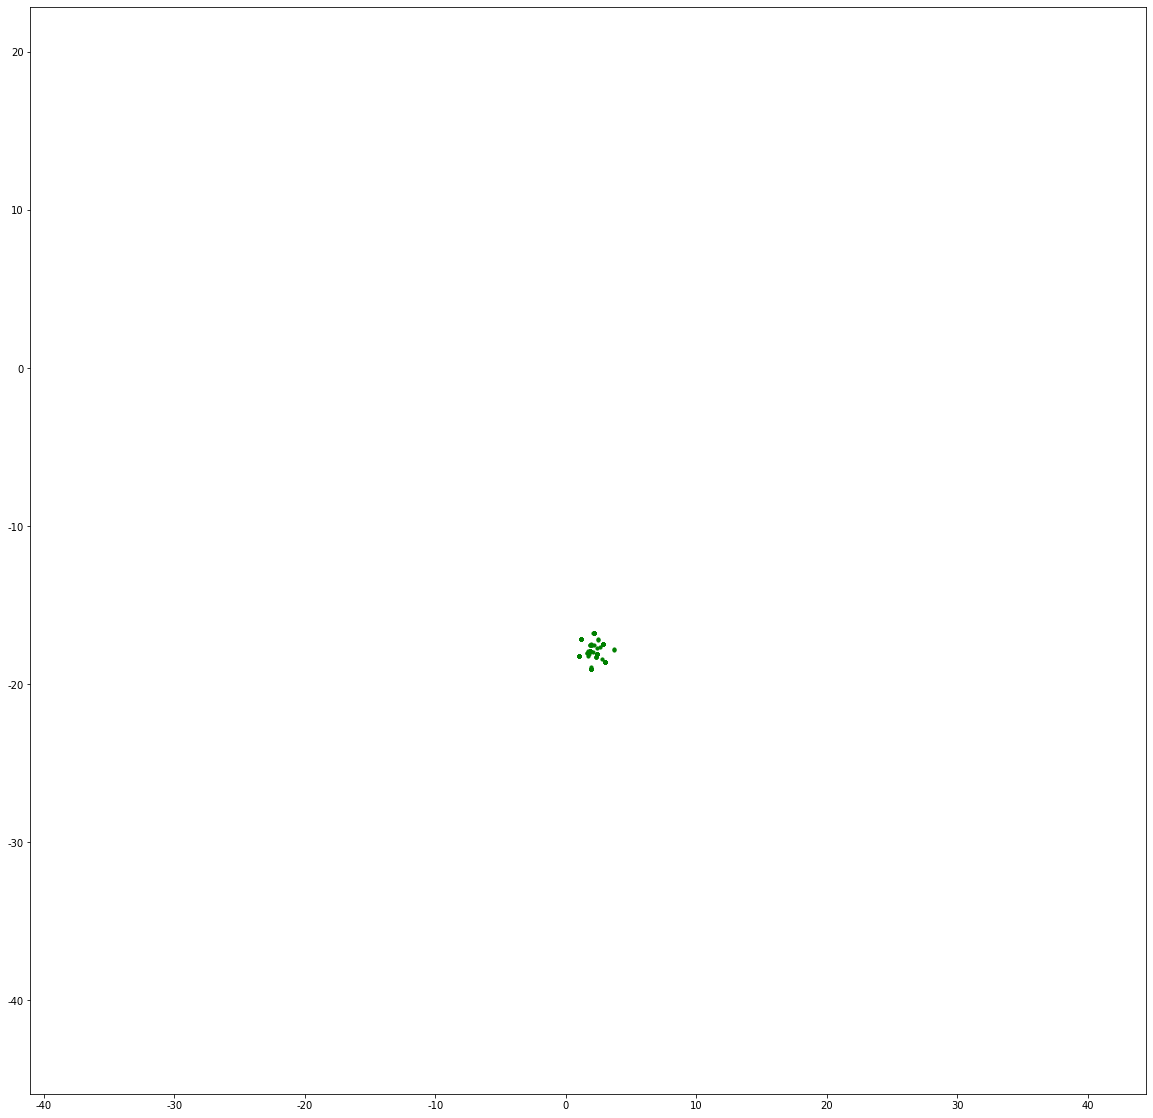

In [380]:
communities_1_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -10 and data_tsne[i,1] > -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_4.append(filenames[i])

# 1-5)

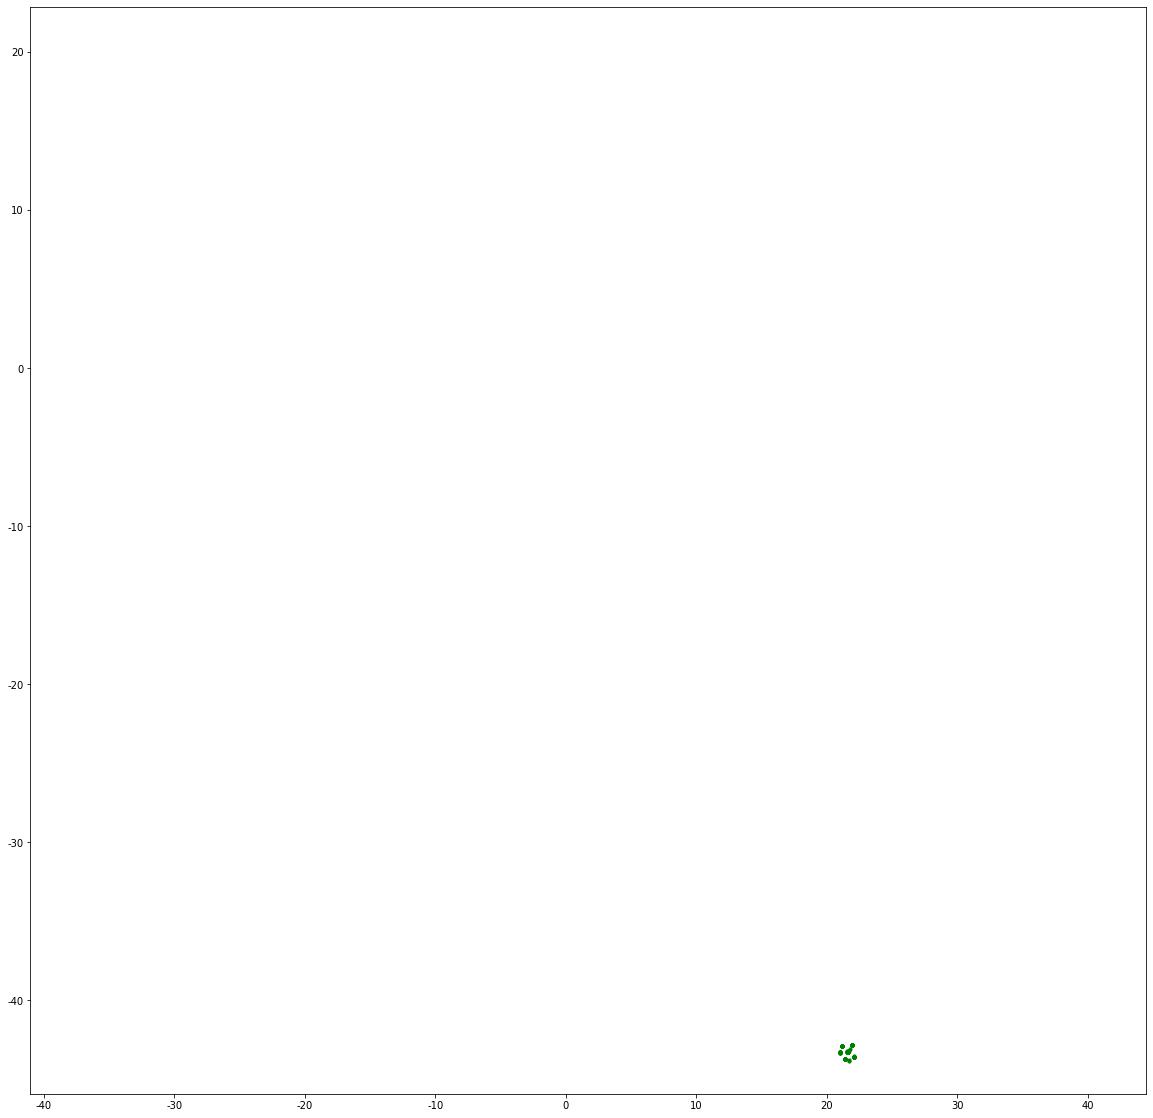

In [381]:
communities_1_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,1] < -40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_5.append(filenames[i])

In [450]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_1_1, 1), word_count_and_tf_idf_similarity(communities_1_2, 1), 
                word_count_and_tf_idf_similarity(communities_1_3, 1), word_count_and_tf_idf_similarity(communities_1_4, 1),
                word_count_and_tf_idf_similarity(communities_1_5, 1)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('life', 0.1197), ('friend', 0.064), ('need', 0.0559), ('life', 0.1048), ('need', 0.0429))

2: (('friend', 0.0931), ('need', 0.0613), ('friend', 0.0382), ('need', 0.081), ('die', 0.0429))

3: (('year', 0.0691), ('life', 0.0613), ('life', 0.0324), ('year', 0.0595), ('help', 0.0368))

4: (('need', 0.0638), ('die', 0.0427), ('depressed', 0.0265), ('kill', 0.0595), ('done', 0.0368))

5: (('anxiety', 0.0638), ('kill', 0.04), ('alone', 0.0235), ('friend', 0.0571), ('kill', 0.0368))

6: (('thought', 0.0559), ('depression', 0.04), ('lonely', 0.0235), ('think', 0.0548), ('talk', 0.0184))

7: (('depression', 0.0532), ('time', 0.04), ('talk', 0.0235), ('die', 0.0524), ('goodbye', 0.0184))

8: (('kill', 0.0532), ('alone', 0.0373), ('hate', 0.0235), ('anxiety', 0.05), ('friend', 0.0184))

9: (('talk', 0.0505), ('suicide', 0.0347), ('die', 0.0206), ('day', 0.0476), ('exist', 0.0123))

10: (('day', 0.0479), ('talk', 0.032), ('today', 0.0206), ('depression', 0.0476), ('option', 0.0123))

11: (('th